### 주요 분석 영역별 인사이트
1. 사회경제적 요인과 학업 성과

부모 교육 수준이 자녀 성적에 미치는 영향 분석
부모 직업과 학업 지원(famsup, paid) 간의 상관관계
거주 지역(도시 vs 시골)에 따른 성과 차이
가족 규모가 개별 학생에게 미치는 영향

2. 학습 환경 및 습관

통학 시간과 출석률, 성적의 관계
주간 공부 시간의 최적 범위 도출
인터넷 접근성이 현대 학습에 미치는 영향
추가 교육 지원(schoolsup, paid)의 실제 효과

3. 생활 패턴과 학업의 균형

과외 활동 참여가 성적에 미치는 영향 (긍정적 vs 부정적)
여가 시간과 외출 빈도의 적정선
연인 관계가 학업 집중도에 미치는 영향
음주 패턴(평일 vs 주말)과 성적 상관관계

4. 심리적 요인

가족 관계 품질이 학업 동기에 미치는 영향
건강 상태와 출석률, 성적의 연관성
고등교육 희망 여부와 현재 성적의 관계


### 성과 예측 모델링

- 어떤 요인들이 최종 성적(G3)을 가장 잘 예측하는가?
- 조기 경고 시스템: 중간 성적(G1, G2)으로 최종 성적 예측
- 낙제 위험군을 미리 식별할 수 있는 패턴은?

### 실제 EDA에서 확인할 만한 패턴들
#### 예상되는 흥미로운 발견들

U자형 곡선: 적당한 외출/여가시간이 최적 성과
임계점 효과: 공부시간이 일정 수준을 넘으면 효율 감소
복합 요인: 단일 요인보다는 여러 요인의 조합이 중요
성별 차이: 남녀 학생의 서로 다른 성과 영향 요인

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm # font 설정
import seaborn as sns

######## 한글 폰트 사용을 위한 설정 ######## 
font_path = "C:/Windows/Fonts/gulim.ttc"  # 사용할 한글 폰트 경로
font_prop = fm.FontProperties(fname=font_path, size=12) # 폰트 속성 객체 생성
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호
plt.rcParams['font.family'] = font_prop.get_name()  # matplotlib 전역 폰트 설정 

In [27]:
# 1. 데이터 불러오기
student_data_df = pd.read_csv('./data/student_data.csv')
higher_students_df = pd.read_csv('./data/higher_students.csv')
student_education_df = pd.read_csv('./data/student_education.csv')

# 2. 데이터 확인 

# 각 데이터셋 기본 정보
datasets_info = {
    'student_data': {
        'df': student_data_df,
        'description': '중/고등학생 성과 데이터 (포르투갈)'
    },
    'higher_students': {
        'df': higher_students_df,
        'description': '대학생 성과 데이터 (키프로스)'
    },
    'student_education': {
        'df': student_education_df,
        'description': '학생 교육 데이터 (인도)'
    }
}

datasets_info


{'student_data': {'df':     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
  0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
  1       GP   F   17       U     GT3       T     1     1   at_home     other   
  2       GP   F   15       U     LE3       T     1     1   at_home     other   
  3       GP   F   15       U     GT3       T     4     2    health  services   
  4       GP   F   16       U     GT3       T     3     3     other     other   
  ..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
  644     MS   F   19       R     GT3       T     2     3  services     other   
  645     MS   F   18       U     LE3       T     3     1   teacher  services   
  646     MS   F   18       U     GT3       T     1     1     other     other   
  647     MS   M   17       U     LE3       T     3     1  services  services   
  648     MS   M   18       R     LE3       T     3     2  services     other   
  
   

In [28]:

print(f"\n📋 데이터셋 기본 정보:")
for name, info in datasets_info.items():
    df = info['df']
    print(f"\n🔸 {name} ({info['description']})")
    print(f"   • 크기: {df.shape}")
    print(f"   • 컬럼: {list(df.columns)}")
    print(f"   • 결측치: {df.isnull().sum().sum()}개")
    print(f"   • 메모리: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


📋 데이터셋 기본 정보:

🔸 student_data (중/고등학생 성과 데이터 (포르투갈))
   • 크기: (649, 30)
   • 컬럼: ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
   • 결측치: 0개
   • 메모리: 0.61 MB

🔸 higher_students (대학생 성과 데이터 (키프로스))
   • 크기: (145, 31)
   • 컬럼: ['Student Age', 'Sex', 'Graduated high-school type', 'Scholarship type', 'Additional work', 'Regular artistic or sports activity', 'Do you have a partner', 'Total salary if available', 'Transportation to the university', 'Accomodation type in Cyprus', "Mother's education", "Father's education", 'Number of sisters/brothers (if available)', 'Parental status', "Mother's occupation", "Father's occupation", 'Weekly study hours', 'Reading frequency (non-scientific books/journals)', 'Reading frequency (scientifi

In [29]:
def analyze_columns(df, dataset_name):
    """각 데이터셋의 컬럼을 분석하여 유의미한 컬럼 식별"""
    print(f"\n🔍 {dataset_name} 컬럼 분석:")
    
    # 수치형 vs 범주형 구분
    numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
    
    print(f"   • 수치형 컬럼 ({len(numeric_cols)}개): {numeric_cols}")
    print(f"   • 범주형 컬럼 ({len(categorical_cols)}개): {categorical_cols}")
    
    # 고유값이 적은 컬럼 (범주형 특성)
    low_cardinality = []
    for col in df.columns:
        unique_count = df[col].nunique()
        if unique_count <= 10:
            low_cardinality.append(f"{col}({unique_count})")
    
    print(f"   • 저카디널리티 컬럼: {low_cardinality}")
    
    return {
        'numeric': numeric_cols,
        'categorical': categorical_cols,
        'low_cardinality': low_cardinality
    }
    
analyze_columns(student_data_df, 'student_data')


🔍 student_data 컬럼 분석:
   • 수치형 컬럼 (13개): ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
   • 범주형 컬럼 (17개): ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
   • 저카디널리티 컬럼: ['school(2)', 'sex(2)', 'age(8)', 'address(2)', 'famsize(2)', 'Pstatus(2)', 'Medu(5)', 'Fedu(5)', 'Mjob(5)', 'Fjob(5)', 'reason(4)', 'guardian(3)', 'traveltime(4)', 'studytime(4)', 'failures(4)', 'schoolsup(2)', 'famsup(2)', 'paid(2)', 'activities(2)', 'nursery(2)', 'higher(2)', 'internet(2)', 'romantic(2)', 'famrel(5)', 'freetime(5)', 'goout(5)', 'Dalc(5)', 'Walc(5)', 'health(5)']


{'numeric': ['age',
  'Medu',
  'Fedu',
  'traveltime',
  'studytime',
  'failures',
  'famrel',
  'freetime',
  'goout',
  'Dalc',
  'Walc',
  'health',
  'absences'],
 'categorical': ['school',
  'sex',
  'address',
  'famsize',
  'Pstatus',
  'Mjob',
  'Fjob',
  'reason',
  'guardian',
  'schoolsup',
  'famsup',
  'paid',
  'activities',
  'nursery',
  'higher',
  'internet',
  'romantic'],
 'low_cardinality': ['school(2)',
  'sex(2)',
  'age(8)',
  'address(2)',
  'famsize(2)',
  'Pstatus(2)',
  'Medu(5)',
  'Fedu(5)',
  'Mjob(5)',
  'Fjob(5)',
  'reason(4)',
  'guardian(3)',
  'traveltime(4)',
  'studytime(4)',
  'failures(4)',
  'schoolsup(2)',
  'famsup(2)',
  'paid(2)',
  'activities(2)',
  'nursery(2)',
  'higher(2)',
  'internet(2)',
  'romantic(2)',
  'famrel(5)',
  'freetime(5)',
  'goout(5)',
  'Dalc(5)',
  'Walc(5)',
  'health(5)']}

In [30]:
# 각 데이터셋 분석
column_analysis = {}
for name, info in datasets_info.items():
    column_analysis[name] = analyze_columns(info['df'], name)


🔍 student_data 컬럼 분석:
   • 수치형 컬럼 (13개): ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']
   • 범주형 컬럼 (17개): ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
   • 저카디널리티 컬럼: ['school(2)', 'sex(2)', 'age(8)', 'address(2)', 'famsize(2)', 'Pstatus(2)', 'Medu(5)', 'Fedu(5)', 'Mjob(5)', 'Fjob(5)', 'reason(4)', 'guardian(3)', 'traveltime(4)', 'studytime(4)', 'failures(4)', 'schoolsup(2)', 'famsup(2)', 'paid(2)', 'activities(2)', 'nursery(2)', 'higher(2)', 'internet(2)', 'romantic(2)', 'famrel(5)', 'freetime(5)', 'goout(5)', 'Dalc(5)', 'Walc(5)', 'health(5)']

🔍 higher_students 컬럼 분석:
   • 수치형 컬럼 (31개): ['Student Age', 'Sex', 'Graduated high-school type', 'Scholarship type', 'Additional work', 'Regular artistic or sports activity', 'Do you have a partner', 'Total salary if available

In [31]:
def map_student_data(df):
    """student_data.csv 매핑"""
    mapped = pd.DataFrame()
    
    # 인덱스를 student_id로 사용
    mapped['student_id'] = range(1, len(df) + 1)
    
    # 직접 매핑 가능한 컬럼들
    column_mapping = {
        'age': 'age',
        'sex': 'gender',
        'address': 'region_type', 
        'famsize': 'family_size',
        'Pstatus': 'parents_status',
        'Medu': 'mother_education',
        'Fedu': 'father_education',
        'Mjob': 'mother_occupation',
        'Fjob': 'father_occupation',
        'school': 'school_type',
        'failures': 'past_failures',
        'traveltime': 'travel_time',
        'studytime': 'study_time',
        'internet': 'internet_access',
        'activities': 'activities',
        'paid': 'paid_classes',
        'famsup': 'family_support',
        'schoolsup': 'school_support',
        'higher': 'higher_ed_desire',
        'romantic': 'romantic',
        'goout': 'going_out',
        'freetime': 'free_time',
        'health': 'health',
        'absences': 'absences'
    }
    
    for orig_col, new_col in column_mapping.items():
        if orig_col in df.columns:
            mapped[new_col] = df[orig_col]
    
    # 성적 컬럼 (있는 경우)
    if 'G1' in df.columns:
        mapped['grade_1'] = df['G1']
    if 'G2' in df.columns:
        mapped['grade_2'] = df['G2'] 
    if 'G3' in df.columns:
        mapped['final_grade'] = df['G3']
    
    # 데이터셋 출처 표시
    mapped['data_source'] = 'student_data'
    
    return mapped

def map_higher_students(df):
    """higher_students.csv 매핑"""
    mapped = pd.DataFrame()
    
    # student_id 생성 (기존 데이터와 겹치지 않도록 10000번대 사용)
    mapped['student_id'] = range(10001, 10001 + len(df))
    
    # 직접 매핑
    if 'Student Age' in df.columns:
        mapped['age'] = df['Student Age']
    if 'Sex' in df.columns:
        mapped['gender'] = df['Sex']
    if 'Mother\'s education' in df.columns:
        mapped['mother_education'] = df['Mother\'s education']
    if 'Father\'s education' in df.columns:
        mapped['father_education'] = df['Father\'s education']
    if 'Mother\'s occupation' in df.columns:
        mapped['mother_occupation'] = df['Mother\'s occupation']
    if 'Father\'s occupation' in df.columns:
        mapped['father_occupation'] = df['Father\'s occupation']
    if 'Graduated high-school type' in df.columns:
        mapped['graduation_type'] = df['Graduated high-school type']
    if 'Scholarship type' in df.columns:
        mapped['scholarship_type'] = df['Scholarship type']
    if 'Additional work' in df.columns:
        mapped['part_time_work'] = df['Additional work']
    if 'Do you have a partner' in df.columns:
        mapped['romantic'] = df['Do you have a partner']
    if 'Total salary if available' in df.columns:
        mapped['monthly_income'] = df['Total salary if available']
    if 'Transportation to the university' in df.columns:
        mapped['transportation'] = df['Transportation to the university']
    if 'Accomodation type in Cyprus' in df.columns:
        mapped['accommodation'] = df['Accomodation type in Cyprus']
    if 'Weekly study hours' in df.columns:
        mapped['study_time'] = df['Weekly study hours']
    
    # 성과 관련
    if 'Cumulative grade point average in the last semester (/4.00)' in df.columns:
        mapped['gpa_current'] = df['Cumulative grade point average in the last semester (/4.00)']
    if 'Expected Cumulative grade point average in the graduation (/4.00)' in df.columns:
        mapped['gpa_expected'] = df['Expected Cumulative grade point average in the graduation (/4.00)']
    
    # 데이터셋 출처 표시
    mapped['data_source'] = 'higher_students'
    
    return mapped

def map_student_education(df):
    """student_education.csv 매핑"""
    mapped = pd.DataFrame()
    
    # student_id 생성 (20000번대 사용)
    mapped['student_id'] = range(20001, 20001 + len(df))
    
    # 직접 매핑
    column_mapping = {
        'Gender': 'gender',
        'Caste': 'caste',
        'coaching': 'coaching',
        'Class_ten_education': 'graduation_type',
        'twelve_education': 'school_type',
        'medium': 'medium',
        'Class_X_Percentage': 'previous_grade_10',
        'Class_XII_Percentage': 'previous_grade_12',
        'Father_occupation': 'father_occupation',
        'Mother_occupation': 'mother_occupation',
        'time': 'time_to_completion'
    }
    
    for orig_col, new_col in column_mapping.items():
        if orig_col in df.columns:
            mapped[new_col] = df[orig_col]
    
    # 데이터셋 출처 표시
    mapped['data_source'] = 'student_education'
    
    return mapped

In [32]:
# 각 데이터셋 매핑
mapped_student_data = map_student_data(student_data_df)
mapped_higher_students = map_higher_students(higher_students_df)
mapped_student_education = map_student_education(student_education_df)

print(f"   • student_data 매핑 완료: {mapped_student_data.shape}")
print(f"   • higher_students 매핑 완료: {mapped_higher_students.shape}")
print(f"   • student_education 매핑 완료: {mapped_student_education.shape}")

# 모든 컬럼 수집
all_columns = set()
for df in [mapped_student_data, mapped_higher_students, mapped_student_education]:
    all_columns.update(df.columns)

print(f"   • 전체 고유 컬럼 수: {len(all_columns)}")

# 통합 데이터프레임 생성 (컬럼을 맞춰서 concat)
unified_df = pd.concat([
    mapped_student_data,
    mapped_higher_students,
    mapped_student_education
], ignore_index=True, sort=False)

print(f"✅ 통합 완료! 최종 크기: {unified_df.shape}")

   • student_data 매핑 완료: (649, 26)
   • higher_students 매핑 완료: (145, 18)
   • student_education 매핑 완료: (666, 13)
   • 전체 고유 컬럼 수: 40
✅ 통합 완료! 최종 크기: (1460, 40)


In [33]:
# 6. 통합 데이터 정보 및 EDA

print(f"\n📊 통합 데이터셋 정보:")
print(f"   • 총 학생 수: {len(unified_df):,}")
print(f"   • 총 컬럼 수: {len(unified_df.columns)}")
print(f"   • 메모리 사용량: {unified_df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")



📊 통합 데이터셋 정보:
   • 총 학생 수: 1,460
   • 총 컬럼 수: 40
   • 메모리 사용량: 1.56 MB


In [39]:
print(unified_df)

      student_id   age  gender region_type family_size parents_status  \
0              1  18.0       F           U         GT3              A   
1              2  17.0       F           U         GT3              T   
2              3  15.0       F           U         LE3              T   
3              4  15.0       F           U         GT3              T   
4              5  16.0       F           U         GT3              T   
...          ...   ...     ...         ...         ...            ...   
1455       20662   NaN  female         NaN         NaN            NaN   
1456       20663   NaN    male         NaN         NaN            NaN   
1457       20664   NaN    male         NaN         NaN            NaN   
1458       20665   NaN    male         NaN         NaN            NaN   
1459       20666   NaN  female         NaN         NaN            NaN   

      mother_education  father_education mother_occupation father_occupation  \
0                  4.0               4.0   

In [34]:

# 데이터 출처별 분포
print(f"\n📈 데이터 출처별 분포:")
source_counts = unified_df['data_source'].value_counts()
for source, count in source_counts.items():
    percentage = count / len(unified_df) * 100
    print(f"   • {source}: {count:,}명 ({percentage:.1f}%)")



📈 데이터 출처별 분포:
   • student_education: 666명 (45.6%)
   • student_data: 649명 (44.5%)
   • higher_students: 145명 (9.9%)


In [35]:
# 결측치 분석
print(f"\n❓ 결측치 분석 (상위 10개):")
missing_analysis = unified_df.isnull().sum().sort_values(ascending=False)
missing_top = missing_analysis.head(10)
for col, missing_count in missing_top.items():
    if missing_count > 0:
        percentage = missing_count / len(unified_df) * 100
        print(f"   • {col}: {missing_count:,}개 ({percentage:.1f}%)")



❓ 결측치 분석 (상위 10개):
   • accommodation: 1,315개 (90.1%)
   • scholarship_type: 1,315개 (90.1%)
   • monthly_income: 1,315개 (90.1%)
   • transportation: 1,315개 (90.1%)
   • gpa_expected: 1,315개 (90.1%)
   • gpa_current: 1,315개 (90.1%)
   • part_time_work: 1,315개 (90.1%)
   • region_type: 811개 (55.5%)
   • free_time: 811개 (55.5%)
   • health: 811개 (55.5%)


In [36]:

# 데이터 타입 분포
print(f"\n🔢 데이터 타입 분포:")
dtype_counts = unified_df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"   • {dtype}: {count}개")


🔢 데이터 타입 분포:
   • object: 22개
   • float64: 17개
   • int64: 1개


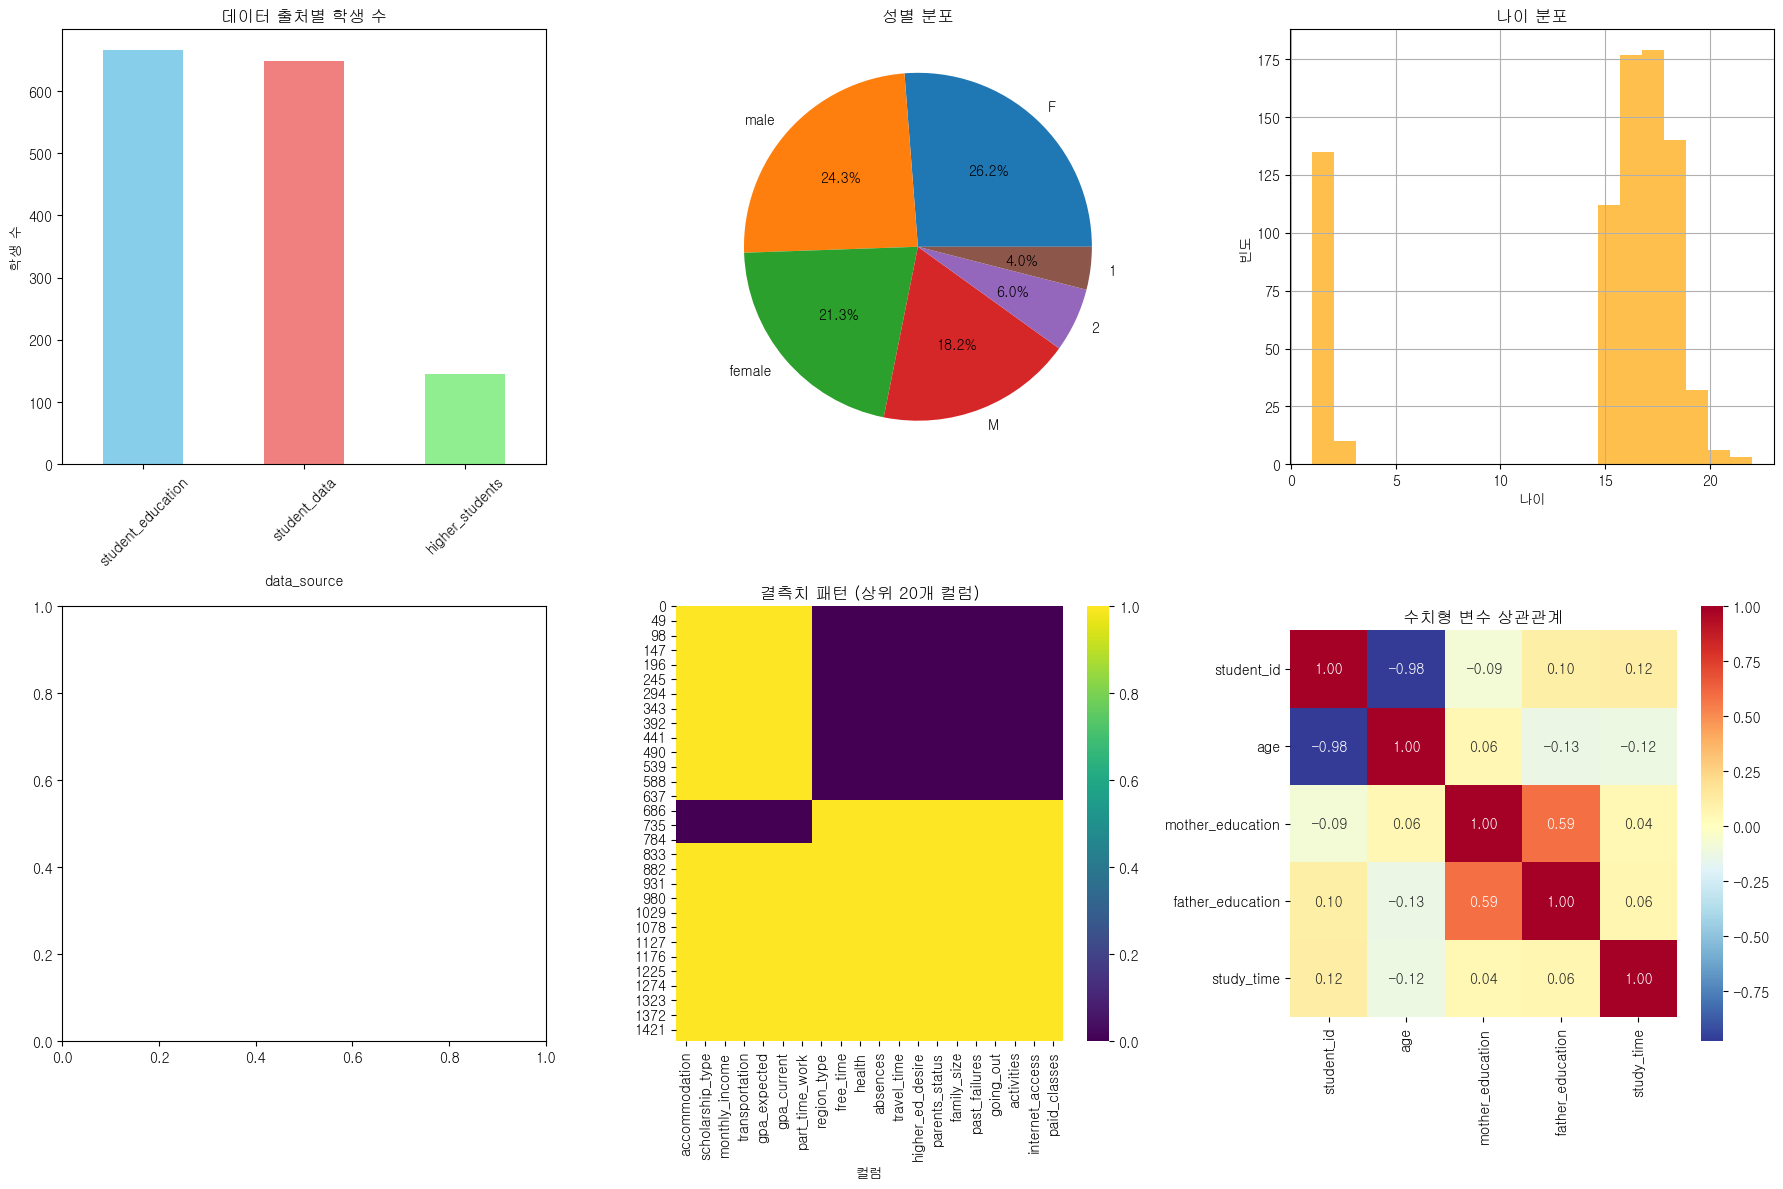

In [37]:
# 7. 기본 시각화

# 서브플롯 생성
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

# 1. 데이터 출처별 분포
source_counts.plot(kind='bar', ax=axes[0], color=['skyblue', 'lightcoral', 'lightgreen'])
axes[0].set_title('데이터 출처별 학생 수')
axes[0].set_ylabel('학생 수')
axes[0].tick_params(axis='x', rotation=45)

# 2. 성별 분포 (있는 경우)
if 'gender' in unified_df.columns:
    gender_counts = unified_df['gender'].value_counts()
    gender_counts.plot(kind='pie', ax=axes[1], autopct='%1.1f%%')
    axes[1].set_title('성별 분포')
    axes[1].set_ylabel('')

# 3. 나이 분포 (있는 경우)  
if 'age' in unified_df.columns:
    unified_df['age'].dropna().hist(bins=20, ax=axes[2], alpha=0.7, color='orange')
    axes[2].set_title('나이 분포')
    axes[2].set_xlabel('나이')
    axes[2].set_ylabel('빈도')

# 4. 최종 성적 분포 (있는 경우)
if 'final_grade' in unified_df.columns:
    unified_df['final_grade'].dropna().hist(bins=30, ax=axes[3], alpha=0.7, color='green')
    axes[3].set_title('최종 성적 분포')
    axes[3].set_xlabel('성적')
    axes[3].set_ylabel('빈도')

# 5. 결측치 히트맵 (상위 20개 컬럼)
cols_with_missing = missing_analysis[missing_analysis > 0].head(20).index
if len(cols_with_missing) > 0:
    missing_matrix = unified_df[cols_with_missing].isnull()
    sns.heatmap(missing_matrix, cbar=True, ax=axes[4], cmap='viridis')
    axes[4].set_title('결측치 패턴 (상위 20개 컬럼)')
    axes[4].set_xlabel('컬럼')

# 6. 수치형 변수 상관관계 (있는 경우)
numeric_cols = unified_df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 1:
    # 결측치가 적은 수치형 컬럼들만 선택
    good_numeric_cols = []
    for col in numeric_cols:
        if unified_df[col].isnull().sum() / len(unified_df) < 0.5:  # 결측치 50% 미만
            good_numeric_cols.append(col)
    
    if len(good_numeric_cols) > 1:
        corr_matrix = unified_df[good_numeric_cols].corr()
        sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, 
                   fmt='.2f', ax=axes[5], square=True)
        axes[5].set_title('수치형 변수 상관관계')

plt.tight_layout()
plt.show()


In [38]:
# 8. 저장 및 다음 단계 안내
# =============================================================================

print(f"\n💾 저장 옵션:")
print(f"   • 통합 데이터: unified_df.to_csv('unified_student_dataset.csv', index=False)")
print(f"   • 결측치 분석: missing_analysis.to_csv('missing_analysis.csv')")

print(f"\n🚀 다음 단계 제안:")
print(f"   1. 결측치 처리 전략 수립")
print(f"   2. 파생 변수 생성 (성적 구간, BMI 등)")
print(f"   3. 머신러닝을 위한 전처리")
print(f"   4. 성과 예측 모델 구축")

print(f"\n📋 주요 변수들:")
important_cols = ['student_id', 'age', 'gender', 'final_grade', 'data_source']
available_important = [col for col in important_cols if col in unified_df.columns]
print(f"   • 핵심 변수: {available_important}")

if len(available_important) > 0:
    print(f"\n🔍 핵심 변수 샘플:")
    display(unified_df[available_important].head(10))

print(f"\n" + "="*50)
print(f"✅ 기존 데이터 통합 및 분석 완료!")
print(f"변수 'unified_df'에 통합 데이터가 저장되었습니다.")
print(f"="*50)


💾 저장 옵션:
   • 통합 데이터: unified_df.to_csv('unified_student_dataset.csv', index=False)
   • 결측치 분석: missing_analysis.to_csv('missing_analysis.csv')

🚀 다음 단계 제안:
   1. 결측치 처리 전략 수립
   2. 파생 변수 생성 (성적 구간, BMI 등)
   3. 머신러닝을 위한 전처리
   4. 성과 예측 모델 구축

📋 주요 변수들:
   • 핵심 변수: ['student_id', 'age', 'gender', 'data_source']

🔍 핵심 변수 샘플:


,student_id,age,gender,data_source
0,1,18.0,F,student_data
1,2,17.0,F,student_data
2,3,15.0,F,student_data
3,4,15.0,F,student_data
4,5,16.0,F,student_data
5,6,16.0,M,student_data
6,7,16.0,M,student_data
7,8,17.0,F,student_data
8,9,15.0,M,student_data
9,10,15.0,M,student_data



✅ 기존 데이터 통합 및 분석 완료!
변수 'unified_df'에 통합 데이터가 저장되었습니다.
